In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Simple Linear Regression
- One input and one output
- Output must be continuous numeric variable

In [2]:
sal = pd.read_csv('Salary_Data.csv')
sal.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [3]:
sal.shape

(30, 2)

In [4]:
sal.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [6]:
sal[sal['Salary']>100544.75]

YearsExperience  Salary
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

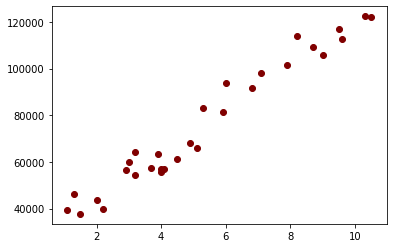

In [7]:
plt.scatter(sal['YearsExperience'], sal['Salary'], color = 'Maroon')
plt.show()

In [10]:
#Splitting the data as input and output
X = np.array(sal['YearsExperience'])
y = np.array(sal['Salary'])
print(X.shape)
print(y.shape)

(30,)
(30,)


In [33]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)   #Model is getting trained on input train data

LinearRegression()

In [37]:
#Predict the output
y_pred = model.predict(x_test)
y_pred

array([[ 55831.10783533],
       [ 39586.85734749],
       [116985.9332013 ],
       [116030.38905495],
       [ 52964.4753963 ],
       [ 63475.46100607]])

In [38]:
y_test

array([[ 64445],
       [ 37731],
       [112635],
       [116969],
       [ 56642],
       [ 55794]], dtype=int64)

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
error = mean_absolute_error(y_test, y_pred)
error

4519.713211380628

## MTcars 

In [2]:
cars = pd.read_csv('mtcars.csv')
cars.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   4.0   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   4.0   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   NaN   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   3.0   
4  Hornet Sportabout  18.7    8  360.0  175  3.15    NaN  17.02   0   0   3.0   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [3]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       3
qsec     0
vs       0
am       0
gear     2
carb     0
dtype: int64

In [4]:
cars['wt'].fillna(np.mean(cars['wt']), inplace=True)

In [5]:
cars['gear'].value_counts()

3.0    14
4.0    11
5.0     5
Name: gear, dtype: int64

In [6]:
cars['gear'].fillna(3.0,inplace = True)

In [7]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

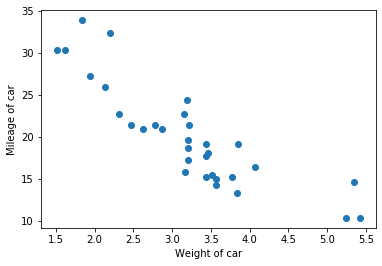

In [48]:
plt.scatter(x=cars['wt'],y=cars['mpg'])
plt.xlabel("Weight of car")
plt.ylabel("Mileage of car")
plt.show()

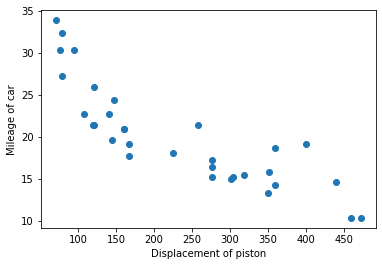

In [49]:
plt.scatter(cars['disp'],cars['mpg'])
plt.xlabel("Displacement of piston")
plt.ylabel("Mileage of car")
plt.show()

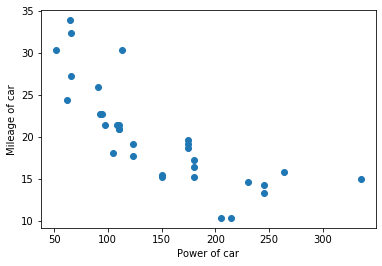

In [50]:
plt.scatter(cars['hp'],cars['mpg'])
plt.xlabel("Power of car")
plt.ylabel("Mileage of car")
plt.show()

In [51]:
X = np.array(cars['wt'])
y = np.array(cars['mpg'])

X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(32, 1)
(32, 1)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [55]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [56]:
y_pred

array([[26.09757982],
       [16.61066576],
       [25.62559405],
       [19.62047022],
       [23.80844882],
       [16.91745651],
       [24.37483175]])

In [57]:
y_test

array([[33.9],
       [19.2],
       [27.3],
       [17.3],
       [22.8],
       [15.2],
       [32.4]])

In [58]:
error = mean_absolute_error(y_test, y_pred)
error

3.5911005953784247

## Multi-Linear Regression
- More than one input and one continuous output

In [10]:
X = cars[['wt','disp','hp']]
y = cars['mpg']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25, 3)
(25,)
(7, 3)
(7,)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred

array([19.12770836, 28.2687089 , 16.65887476,  8.56974158, 18.78164047,
       14.39927721,  9.81624019])

In [16]:
y_test

22    15.2
27    30.4
13    15.2
16    14.7
21    15.5
23    13.3
14    10.4
Name: mpg, dtype: float64

In [17]:
from sklearn.metrics import mean_absolute_error
print("The absolute error is:", mean_absolute_error(y_test, y_pred))

The absolute error is: 2.658972875851398


In [19]:
from sklearn.metrics import mean_squared_error
print("The absolute error is:", np.sqrt(mean_squared_error(y_test, y_pred)))

The absolute error is: 3.207046452718965


## Polynomial Regression
- Used to capture non linear relations between input and output

In [20]:
df = pd.read_csv("Position_Salaries.csv")
df.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [21]:
df.shape

(10, 3)

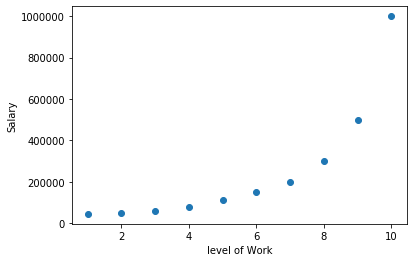

In [24]:
plt.scatter(df['Level'], df['Salary'])
plt.xlabel("level of Work")
plt.ylabel("Salary")
plt.show()

In [25]:
#Splitting data into input and output
X = np.array(df['Level'])
y = np.array(df['Salary'])

In [26]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [28]:
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [29]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression()

In [40]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
model_pr = LinearRegression()
model_pr.fit(x_poly,y)

LinearRegression()

In [41]:
#Predicting output using Linear reg. and normal input
y_pred_lr = model_lr.predict(X)

#Predict output using liner regression and converted polynomial input
y_pred_pr = model_pr.predict(x_poly)

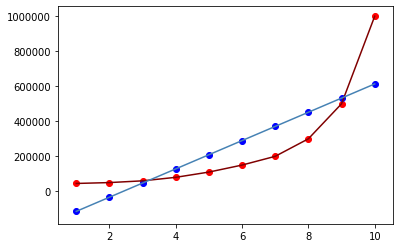

In [45]:
plt.scatter(X,y,color = 'Red')
plt.plot(X,y,color = "Maroon")
plt.scatter(X,y_pred_lr,color='blue')
plt.plot(X,y_pred_lr,color = 'Steelblue')
plt.show()

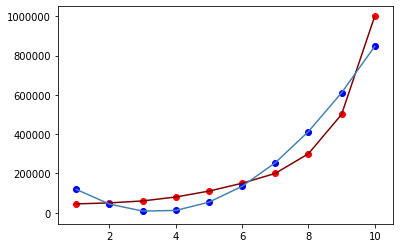

In [43]:
plt.scatter(X,y,color = 'Red')
plt.plot(X,y,color = "Maroon")
plt.scatter(X,y_pred_pr,color='blue')
plt.plot(X,y_pred_pr,color = 'Steelblue')
plt.show()